In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = '/Users/beatr/Downloads/songs_normalize.csv'
songs = pd.read_csv(url)

In [ ]:
df_group = songs[["energy","popularity"]]

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(df_group)

KMeans(n_clusters=3)

<AxesSubplot:xlabel='energy', ylabel='popularity'>

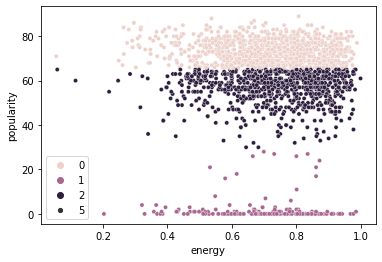

In [ ]:
sns.scatterplot(data=df_group, x="energy", y="popularity", hue=kmeans.labels_, size = 5)

Com base nesse gráfico entre Energia da música e Popularidade, é perceptível que no ranking de top do Spotify tem mais músicas com mais energia, e inclusive no grupo que tem as músicas mais populares, percebe-se que elas tem em média mais que 0,6 de energia musical, concluindo que muitos usuários que utilizam Spotify preferem músicas que possuem mais energia.

In [ ]:
df_group = songs[["acousticness", "popularity" ]]

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(df_group)

KMeans(n_clusters=3)

<AxesSubplot:xlabel='acousticness', ylabel='popularity'>

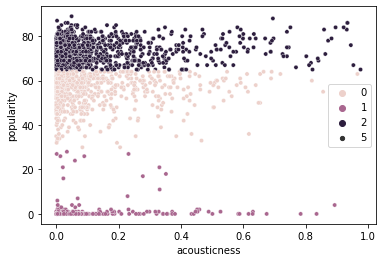

In [ ]:
sns.scatterplot(data=df_group, x="acousticness", y="popularity", hue=kmeans.labels_, size = 5)

Já contradizendo as informações sobre energia musical, é percebível nesses dados que poucos usuários preferem música acústica. Chegamos assim a conclusão que obras que possuem mais energia são preferidas ao invés de músicas acústicas.

<AxesSubplot:xlabel='danceability', ylabel='popularity'>

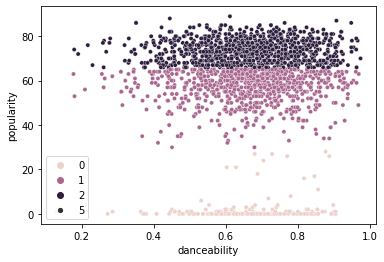

In [ ]:
df_group = songs[["danceability", "popularity" ]]
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_group)
sns.scatterplot(data=df_group, x="danceability", y="popularity", hue=kmeans.labels_, size = 5)

Sobre dançabilidade e popularidade, apesar de não parecer ter muita influência direta, a maioria das músicas mais populares do top do Spotify estão nessa faixa de dançabilidade (por volta de 0.5 a 0.9) vendo levando que o total já faz parte do Top Spotify.

In [2]:

url2 = 'https://gist.githubusercontent.com/rioto9858/ff72b72b3bf5754d29dd1ebf898fc893/raw/1164a139a780b0826faef36c865da65f2d3573e0/top50MusicFrom2010-2019.csv'

df_songs = pd.read_csv(url2)

In [3]:
df_songs  #testando o dataframe

,title,artist,the genre of the track,year,Beats.Per.Minute -The tempo of the song,"Energy- The energy of a song - the higher the value, the more energtic","Danceability - The higher the value, the easier it is to dance to this song","Loudness/dB - The higher the value, the louder the song","Liveness - The higher the value, the more likely the song is a live recording","Valence - The higher the value, the more positive mood for the song",Length - The duration of the song,Acousticness - The higher the value the more acoustic the song is,Speechiness - The higher the value the more spoken word the song contains,Popularity- The higher the value the more popular the song is
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [4]:
#Agora vou tirar as colunas que não preciso para essa avaliação.

df_songs = df_songs[['title','artist','the genre of the track','year', 'Loudness/dB - The higher the value, the louder the song', 'Liveness - The higher the value, the more likely the song is a live recording', 'Length - The duration of the song', 'Popularity- The higher the value the more popular the song is']]

#E otimizar os nomes, para facilitar e iguala-los.
df_songs.columns = ['Name', 'Artist', 'Genre', 'Year on Top50', 'Volume/dB', 'Liveness', 'Length', 'Popularity']

In [5]:
df_songs.columns

Index(['Name', 'Artist', 'Genre', 'Year on Top50', 'Volume/dB', 'Liveness',
       'Length', 'Popularity'],
      dtype='object')

In [6]:
df_songs.columns

Index(['Name', 'Artist', 'Genre', 'Year on Top50', 'Volume/dB', 'Liveness',
       'Length', 'Popularity'],
      dtype='object')

In [7]:
df_songs_nums = df_songs[['Year on Top50', 'Volume/dB', 'Liveness','Length', 'Popularity']]
df_songs_nums

,Year on Top50,Volume/dB,Liveness,Length,Popularity
0,2010,-4,8,217,83
1,2010,-5,52,263,82
2,2010,-3,29,200,80
3,2010,-4,8,295,79
4,2010,-5,9,221,78
...,...,...,...,...,...
598,2019,-7,20,176,75
599,2019,-6,7,206,75
600,2019,-5,9,260,70
601,2019,-6,42,217,69


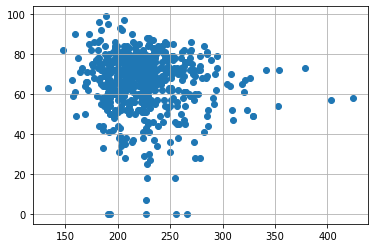

In [14]:
teste = plt.scatter(df_songs_nums['Length'], df_songs_nums['Popularity'])
plt.grid(teste)

In [9]:
df_LP = df_songs_nums[['Length', 'Popularity']]
df_LP

,Length,Popularity
0,217,83
1,263,82
2,200,80
3,295,79
4,221,78
...,...,...
598,176,75
599,206,75
600,260,70
601,217,69


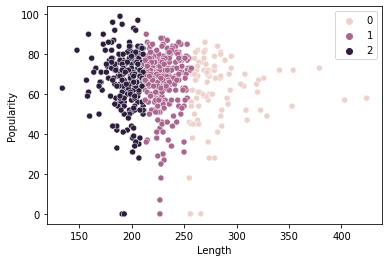

In [12]:
kmeans = KMeans(init="random", n_clusters=3, random_state=0)
kmeans.fit(df_LP)

sns.scatterplot(data=df_LP, x='Length', y='Popularity', hue=kmeans.labels_)
plt.show() 

Aqui podemos ver que a maioria das músicas tem entre 200 e 250 segundos de duração(Length) mas as mais populares estão mais concentradas no cluster 2, onde a maioria tem por volta de 200 segundos. O que leva a concluir que o público do Spotify está gostando mais de músicas menores. A razão disso supomos que é por aplicativos modernos como Tiktok e Instagram que agora tem videos curtos, que estão bem famosos mas utilizam apenas poucos segundos.

Algumas perguntas que podemos tirar: Qual período em anos do top Spotify que músicas com mais energia passaram as musicas acústicas, levando que músicas mais acústicas tendem a ter menos energias que músicas majoritalmente digitais? Ou já é assim desde o início da apuração?

Qual genero de música tende a ter as músicas:
- Com mais energia?
- Mais acústicas?
- Mais curtas/longas?
- Mais dançáveis?

